In [141]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

3.3

In [125]:
data = pd.read_csv("cleanData.csv")

data = data.drop("Place Name_x", 1)

data["Male persons age under 5 years"] = data["Male persons age under 5 years"].replace("...", np.nan)

data = data.dropna()

agedata = data.loc[:,"Total persons": "Female persons age 75 and over"]
agedata["AveragePrice"] = data.iloc[:,104]

In [126]:
agedata
#agedata["AveragePrice"] = agedata["AveragePrice"].str.replace("$","")
#agedata["AveragePrice"] = agedata["AveragePrice"].replace("0.00",np.nan)
#agedata["AveragePrice"] = agedata["AveragePrice"].str.replace(",","")
#agedata["AveragePrice"] = agedata["AveragePrice"].str.replace(".00","")
#agedata["AveragePrice"] = agedata["AveragePrice"].replace("...",np.nan)
#agedata["AveragePrice"] = agedata["AveragePrice"].replace(" ... ",np.nan)

#agedata = agedata.dropna()

for col in agedata:
    agedata[col] = agedata[col].str.replace("$","")
    agedata[col] = agedata[col].str.replace(",","")
    #agedata[col] = agedata[col].str.replace(".00","")
    agedata[col] = agedata[col].replace("...", np.nan)
    agedata[col] = agedata[col].replace(" ... ", np.nan)
    agedata[col] = agedata[col].replace(" -   ", np.nan)
    agedata[col] = agedata[col].replace("", np.nan)
    agedata = agedata.dropna()
    agedata[col] = agedata[col].astype(str).astype(float)

#agedata.to_csv("extracleanData.csv", encoding='utf-8')

# Proportion of Female Above 45 vs Average Price

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


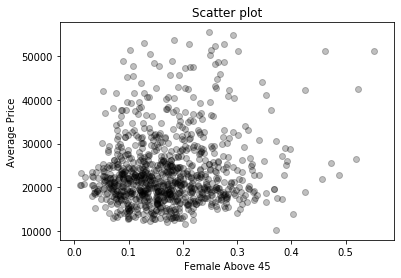

In [185]:

agedata["femaleAbove45"] = (agedata["Female persons age 45-54 years"] + agedata["Female persons age 55-59 years"] + agedata["Female persons age 60-61 years"] + agedata["Female persons age 62-64 years"] + agedata["Female persons age 65-74 years"] + agedata["Female persons age 75 and over"]) / (agedata["Total persons"])

agedata


colors = (0,0,0)

plt.scatter(agedata["femaleAbove45"], agedata["AveragePrice"], c=colors, alpha=0.25)
plt.title('Scatter plot')
plt.xlabel('Female Above 45')
plt.ylabel('Average Price')
plt.show()

# Proportion of children below 5 vs Avg Price

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


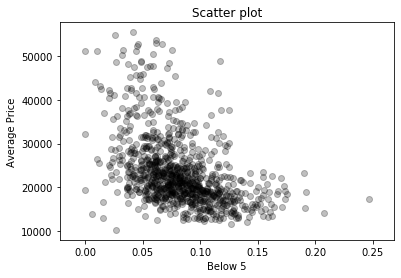

In [129]:
agedata["malebelow16"] = (agedata["Male persons age under 5 years"] + agedata["Male persons age 5 years"] + agedata["Male persons age 6 years"] + agedata["Male persons age 7-9 years"] + agedata["Male persons age 10-13 years"] + agedata["Male persons age 14 years"] + agedata["Male persons age 15 years"] + agedata["Male persons age 16 years"]) / (agedata["Total persons"])
agedata["under5"] = (agedata["Male persons age under 5 years"] + agedata["Female persons age under 5 years"]) / (agedata["Total persons"])

colors = (0,0,0)

plt.scatter(agedata["under5"], agedata["AveragePrice"], c=colors, alpha=0.25)
plt.title('Scatter plot')
plt.xlabel('Below 5')
plt.ylabel('Average Price')
plt.show()




# Regression Line for Young Children Data (Rescaled)

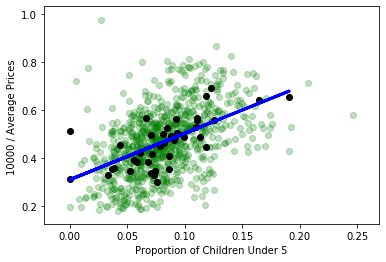

Coefficients: 
 [1.93632754]
Mean squared error: 0.01
Coefficient of determination: 0.47
Coefficient of determination: 0.22


In [201]:
under5data = pd.DataFrame()

under5data["under5"] = agedata["under5"]
under5data["AveragePrice"] = agedata["AveragePrice"]

under5data

#Convert to numpy array

X = under5data["under5"].values
X = X.reshape(-1, 1)

Y = 10000/(under5data["AveragePrice"].values)

# Split the data into training/testing sets
X_train = X[:-40]
X_test = X[-40:]

# Split the targets into training/testing sets
Y_train = Y[:-40]
Y_test = Y[-40:]

#X_train

regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# Plot outputs
plt.scatter(X_train, Y_train, color = "green",  alpha=0.25)
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.xlabel('Proportion of Children Under 5')
plt.ylabel('10000 / Average Prices ')

#plt.xticks(())
#plt.yticks(())

plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))


Allpred = regr.predict(X_train)

print('Coefficient of determination: %.2f'
      % r2_score(Y_train, Allpred))


In [160]:
#Child Data


extradata = pd.read_csv("cleanData.csv")

children = pd.DataFrame()

children["minors"] = extradata["Persons under 18 own (never married) in husband wife family"]
children["Total persons"] = extradata["Total persons"]
children["AveragePrice"] = extradata.iloc[:,105]

for col in children:
    children[col] = children[col].str.replace("$","")
    children[col] = children[col].str.replace(",","")
    #agedata[col] = agedata[col].str.replace(".00","")
    children[col] = children[col].replace("...", np.nan)
    children[col] = children[col].replace(" ... ", np.nan)
    children[col] = children[col].replace(" -   ", np.nan)
    children[col] = children[col].replace("", np.nan)
    children = children.dropna()
    children[col] = children[col].astype(str).astype(float)

children["childratio"] = children["minors"] / children["Total persons"]

children

,minors,Total persons,AveragePrice,childratio
0,243.0,901.0,32298.0,0.269700
1,172.0,683.0,29485.0,0.251830
2,156.0,532.0,37151.0,0.293233
3,89.0,421.0,44712.0,0.211401
4,102.0,489.0,33229.0,0.208589
...,...,...,...,...
1258,34.0,108.0,28269.0,0.314815
1259,75.0,271.0,22050.0,0.276753
1260,66.0,259.0,25313.0,0.254826
1261,128.0,444.0,33290.0,0.288288


# Proportion of minors vs Avg Price

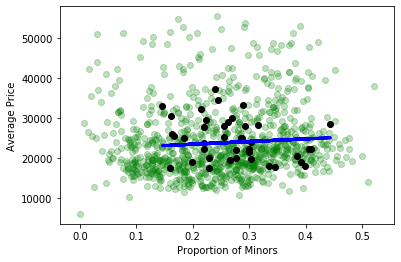

Coefficients: 
 [6645.33522701]
Mean squared error: 29300094.94
Coefficient of determination: -0.09


In [200]:
#Convert to numpy array

X = children["childratio"].values
X = X.reshape(-1, 1)

Y = children["AveragePrice"].values

# Split the data into training/testing sets
X_train = X[:-40]
X_test = X[-40:]

# Split the targets into training/testing sets
Y_train = Y[:-40]
Y_test = Y[-40:]

#X_train

regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# Plot outputs
plt.scatter(X_train, Y_train, color = "green",  alpha=0.25)
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.xlabel('Proportion of Minors')
plt.ylabel('Average Price')

#plt.xticks(())
#plt.yticks(())

plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

In [192]:
#Romm Number Data


initialdata = pd.read_csv("cleanData.csv")

roomdata = pd.DataFrame()



roomdata["minors"] = initialdata["Persons under 18 own (never married) in husband wife family"]
roomdata["Total persons"] = initialdata["Total persons"]
roomdata["Total housing"] = initialdata["Total housing units"]
roomdata["Total houses rented"] = initialdata["Total renter occupied housing units (includes White, Black and other races)"]
roomdata["Renters"] = initialdata["Persons in renter occupied housing units"]
roomdata["Total people"] = initialdata["Persons in total occupied housing units"]
roomdata["AveragePrice"] = initialdata.iloc[:,105]

for col in roomdata:
    roomdata[col] = roomdata[col].str.replace("$","")
    roomdata[col] = roomdata[col].str.replace(",","")
    #agedata[col] = agedata[col].str.replace(".00","")
    roomdata[col] = roomdata[col].replace("...", np.nan)
    roomdata[col] = roomdata[col].replace(" ... ", np.nan)
    roomdata[col] = roomdata[col].replace(" -   ", np.nan)
    roomdata[col] = roomdata[col].replace("", np.nan)
    roomdata = roomdata.dropna()
    roomdata[col] = roomdata[col].astype(str).astype(float)

roomdata["minorratio"] = children["minors"] / children["Total persons"]
roomdata["Avgrent"] = roomdata["Total houses rented"] / roomdata["Total housing"]
roomdata["PropRent"] = roomdata["Renters"] / roomdata["Total people"]

roomdata

,minors,Total persons,Total housing,Total houses rented,Renters,Total people,AveragePrice,minorratio,Avgrent,PropRent
0,243.0,901.0,302.0,47.0,139.0,901.0,32298.0,0.269700,0.155629,0.154273
1,172.0,683.0,234.0,23.0,63.0,683.0,29485.0,0.251830,0.098291,0.092240
2,156.0,532.0,176.0,10.0,33.0,532.0,37151.0,0.293233,0.056818,0.062030
3,89.0,421.0,159.0,30.0,60.0,421.0,44712.0,0.211401,0.188679,0.142518
4,102.0,489.0,209.0,24.0,43.0,489.0,33229.0,0.208589,0.114833,0.087935
...,...,...,...,...,...,...,...,...,...,...
1258,34.0,108.0,35.0,8.0,25.0,108.0,28269.0,0.314815,0.228571,0.231481
1259,75.0,271.0,99.0,17.0,44.0,271.0,22050.0,0.276753,0.171717,0.162362
1260,66.0,259.0,89.0,24.0,72.0,259.0,25313.0,0.254826,0.269663,0.277992
1261,128.0,444.0,138.0,33.0,102.0,416.0,33290.0,0.288288,0.239130,0.245192


# Proportion of Minors vs % of Housing Rented

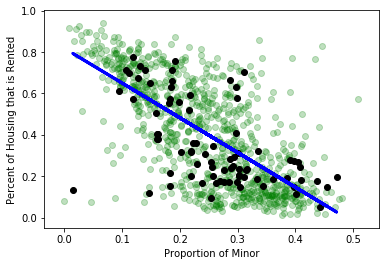

Coefficients: 
 [-1.67741774]
Mean squared error: 0.03
Coefficient of determination: 0.24
Coefficient of determination: 0.46


In [198]:
#Convert to numpy array

X = roomdata["minorratio"].values
X = X.reshape(-1, 1)

Y = roomdata["Avgrent"].values

# Split the data into training/testing sets
X_train = X[:-80]
X_test = X[-80:]

# Split the targets into training/testing sets
Y_train = Y[:-80]
Y_test = Y[-80:]

#X_train

regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# Plot outputs
plt.scatter(X_train, Y_train, color = "green",  alpha=0.25)
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.xlabel('Proportion of Minor')
plt.ylabel('Percent of Housing that is Rented')

#plt.xticks(())
#plt.yticks(())

plt.show()

pred = regr.predict(X_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(Y_train, pred))

# Proportion of Minors vs % of Renters 

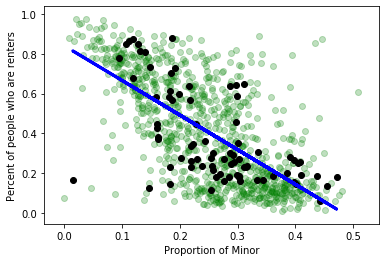

Coefficients: 
 [-1.734811]
Mean squared error: 0.03
Coefficient of determination: 0.35
Coefficient of determination: 0.45


In [199]:
#Convert to numpy array

X = roomdata["minorratio"].values
X = X.reshape(-1, 1)

Y = roomdata["PropRent"].values

# Split the data into training/testing sets
X_train = X[:-80]
X_test = X[-80:]

# Split the targets into training/testing sets
Y_train = Y[:-80]
Y_test = Y[-80:]

#X_train

regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# Plot outputs
plt.scatter(X_train, Y_train, color = "green", alpha=0.25)
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.xlabel('Proportion of Minor')
plt.ylabel('Percent of people who are renters')

#plt.xticks(())
#plt.yticks(())

plt.show()

pred = regr.predict(X_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(Y_train, pred))